In [ ]:
import os 
os.environ['Kaggle_config_dir']='/content/kaggle.json'

In [ ]:
!kaggle datasets download -d karangadiya/fifa19

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


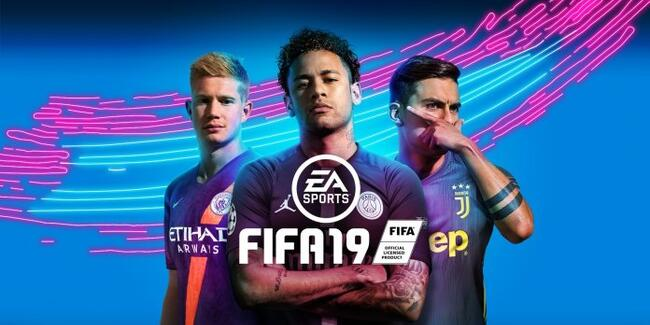

# **`IMPORTING FIFA 2019 DATA`**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DV/data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
!pip install  pandas_visual_analysis

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
#There are many space between columns
df.columns=[column.replace(" ","") for column in df.columns]
df.columns

Index(['Unnamed:0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDi

In [ ]:
print("Shape of the dataset:",df.shape)
print("\n")
print("Size of the dataset",df.size)

Shape of the dataset: (18207, 89)


Size of the dataset 1620423


# ****`PREPROCESSING`****

In [ ]:
df.describe()

,Unnamed:0,ID,Age,Overall,Potential,Special,InternationalReputation,WeakFoot,SkillMoves,JerseyNumber,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed:0                18207 non-null  int64  
 1   ID                       18207 non-null  int64  
 2   Name                     18207 non-null  object 
 3   Age                      18207 non-null  int64  
 4   Photo                    18207 non-null  object 
 5   Nationality              18207 non-null  object 
 6   Flag                     18207 non-null  object 
 7   Overall                  18207 non-null  int64  
 8   Potential                18207 non-null  int64  
 9   Club                     17966 non-null  object 
 10  ClubLogo                 18207 non-null  object 
 11  Value                    18207 non-null  object 
 12  Wage                     18207 non-null  object 
 13  Special                  18207 non-null  int64  
 14  PreferredFoot         

In [ ]:
count=0
for i in df.columns:
   if(df[i].isnull().sum() !=0):
    count+=1  
print("Number of null columns   :",count)
print("Number of nonnull columns:",df.shape[1]-count)

Number of null columns   : 76
Number of nonnull columns: 13


In [ ]:
df.isnull().sum().sort_values(ascending=False)

LoanedFrom    16943
LWB            2085
LM             2085
CB             2085
LCB            2085
              ...  
Potential         0
ClubLogo          0
Wage              0
Special           0
Unnamed:0         0
Length: 89, dtype: int64

In [ ]:
df.isnull().sum().sum()

76984

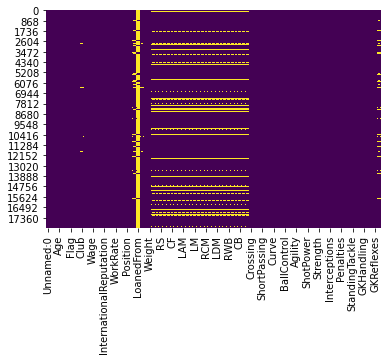

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
df.drop(["LoanedFrom","ReleaseClause"],axis=1,inplace=True) #greater null values

In [ ]:
df.drop(["ClubLogo","Photo","Joined","Unnamed:0"],axis=1,inplace=True) #unecessary columns

In [ ]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weigth = df[df["Weight"].isnull()].index.tolist()

In [ ]:
#To check if all the missing values are from the same id or not 
if missing_height == missing_weigth:
  print("Same")
else:
  print("Not Same")

Same


In [ ]:
df.drop(df.index[missing_height],axis=0,inplace=True)

In [ ]:
df.shape

(18159, 83)

In [ ]:
df.fillna(" ",inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
"""df.drop("RS",axis=1,inplace=True)
df.drop("CF",axis=1,inplace=True)
df.drop("LAM",axis=1,inplace=True)
df.drop("LM",axis=1,inplace=True)
df.drop("RCM",axis=1,inplace=True)
df.drop("LDM",axis=1,inplace=True)
df.drop("RWB",axis=1,inplace=True)
df.drop("CB",axis=1,inplace=True)"""

'df.drop("RS",axis=1,inplace=True)\ndf.drop("CF",axis=1,inplace=True)\ndf.drop("LAM",axis=1,inplace=True)\ndf.drop("LM",axis=1,inplace=True)\ndf.drop("RCM",axis=1,inplace=True)\ndf.drop("LDM",axis=1,inplace=True)\ndf.drop("RWB",axis=1,inplace=True)\ndf.drop("CB",axis=1,inplace=True)'

##**` Exploratory Data Analysis`**

# **`GOALS`**

# **`Exploring World map with their respective Overall's`**

In [ ]:
locatodf=df[["Nationality","Overall"]].groupby(by="Nationality",as_index=False).sum().sort_values("Overall",ascending=False)
locatodf

,Nationality,Overall
46,England,105110
59,Germany,78986
139,Spain,74655
6,Argentina,64190
55,France,61782
...,...,...
98,Malta,61
14,Belize,60
138,South Sudan,60
19,Botswana,56


In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [ ]:
longitude = []
latitude = []
def findGeocode(city):
      try:
        geolocator = Nominatim(user_agent="your_app_name")
        return geolocator.geocode(city)
      except GeocoderTimedOut:
        return findGeocode(city)

for i in (locatodf["Nationality"]):
  if findGeocode(i) != None:
    loc = findGeocode(i)
    latitude.append(loc.latitude)
    longitude.append(loc.longitude)
  else:
    latitude.append(np.nan)
    longitude.append(np.nan)

In [ ]:
locatodf["Longitude"] = longitude
locatodf["Latitude"] = latitude
locatodf

,Nationality,Overall,Longitude,Latitude
46,England,105110,-1.264906,52.531021
59,Germany,78986,10.423447,51.083420
139,Spain,74655,-4.837979,39.326068
6,Argentina,64190,-64.967282,-34.996496
55,France,61782,1.888334,46.603354
...,...,...,...,...
98,Malta,61,14.383631,35.944673
14,Belize,60,-88.760093,16.825979
138,South Sudan,60,29.666790,7.869943
19,Botswana,56,24.592874,-23.168178


In [ ]:
locatodf.dropna(axis=0,inplace=True)
locatodf.isnull().sum()

Nationality    0
Overall        0
Longitude      0
Latitude       0
dtype: int64

In [ ]:
import folium
from folium.plugins import MarkerCluster
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(locatodf)):
        lat = locatodf.iloc[i]['Latitude']
        long = locatodf.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %Overall : {}<br>"""
        popup_text = popup_text.format(locatodf.iloc[i]['Nationality'],
                                   locatodf.iloc[i]['Overall']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)#show the map
world_map

# *From this map it is easier to see the countries with overall sum of the players *

# **`Visualizing the players data of India`**

In [ ]:
indian_players=df[df["Nationality"] == "India"]
indian_players

,ID,Name,Age,Nationality,Flag,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,...,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
8605,190939,S. Chhetri,33,India,https://cdn.sofifa.org/flags/159.png,67,67,,€0,€0,1704,Right,1.0,4.0,3.0,High/ Medium,Normal,No,LS,11,,5'7,154lbs,66+2,66+2,66+2,63+2,64+2,64+2,64+2,63+2,62+2,62+2,62+2,61+2,54+2,54+2,54+2,61+2,50+2,...,50+2,49+2,43+2,43+2,43+2,49+2,49.0,71.0,67.0,56.0,68.0,63.0,67.0,68.0,39.0,64.0,76.0,73.0,72.0,62.0,76.0,66.0,60.0,68.0,59.0,67.0,49.0,25.0,65.0,56.0,73.0,67.0,30.0,24.0,44.0,10.0,7.0,11.0,9.0,10.0
10011,223763,S. Jhingan,24,India,https://cdn.sofifa.org/flags/159.png,65,71,,€0,€0,1472,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,RCB,5,,6'2,163lbs,46+2,46+2,46+2,42+2,43+2,43+2,43+2,42+2,42+2,42+2,42+2,44+2,45+2,45+2,45+2,44+2,55+2,...,55+2,58+2,64+2,64+2,64+2,58+2,29.0,26.0,71.0,52.0,25.0,31.0,30.0,30.0,43.0,46.0,69.0,78.0,64.0,58.0,54.0,52.0,80.0,63.0,79.0,33.0,61.0,63.0,27.0,35.0,34.0,64.0,64.0,61.0,60.0,13.0,11.0,7.0,11.0,12.0
12598,217225,J. Lalpekhlua,27,India,https://cdn.sofifa.org/flags/159.png,63,64,,€0,€0,1630,Right,1.0,3.0,2.0,Medium/ Medium,Stocky,No,RS,12,,5'9,165lbs,62+2,62+2,62+2,62+2,60+2,60+2,60+2,62+2,59+2,59+2,59+2,60+2,53+2,53+2,53+2,60+2,50+2,...,50+2,48+2,43+2,43+2,43+2,48+2,61.0,63.0,57.0,57.0,50.0,61.0,47.0,58.0,46.0,64.0,77.0,74.0,79.0,57.0,80.0,70.0,52.0,60.0,63.0,64.0,47.0,34.0,55.0,46.0,65.0,47.0,28.0,31.0,29.0,13.0,11.0,10.0,10.0,11.0
12811,225213,G. Singh Sandhu,26,India,https://cdn.sofifa.org/flags/159.png,63,68,,€0,€0,1063,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,23,,6'4,198lbs,,,,,,,,,,,,,,,,,,...,,,,,,,20.0,13.0,18.0,24.0,16.0,13.0,14.0,20.0,27.0,23.0,42.0,40.0,38.0,65.0,37.0,14.0,51.0,36.0,70.0,13.0,23.0,23.0,16.0,40.0,15.0,57.0,19.0,15.0,11.0,63.0,59.0,59.0,62.0,64.0
13508,238205,A. Edathodika,31,India,https://cdn.sofifa.org/flags/159.png,62,62,,€0,€0,1384,Left,1.0,3.0,2.0,Medium/ Medium,Normal,No,LCB,22,,6'0,172lbs,42+2,42+2,42+2,42+2,40+2,40+2,40+2,42+2,39+2,39+2,39+2,43+2,40+2,40+2,40+2,43+2,54+2,...,54+2,57+2,61+2,61+2,61+2,57+2,41.0,22.0,64.0,38.0,27.0,44.0,28.0,32.0,22.0,37.0,62.0,64.0,56.0,62.0,57.0,27.0,59.0,63.0,79.0,29.0,48.0,57.0,39.0,32.0,37.0,49.0,67.0,62.0,68.0,14.0,15.0,14.0,11.0,7.0
14054,231461,P. Halder,25,India,https://cdn.sofifa.org/flags/159.png,61,67,,€0,€0,1570,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RCM,17,,5'11,163lbs,51+2,51+2,51+2,53+2,52+2,52+2,52+2,53+2,54+2,54+2,54+2,55+2,57+2,57+2,57+2,55+2,58+2,...,58+2,58+2,57+2,57+2,57+2,58+2,48.0,41.0,54.0,67.0,45.0,53.0,41.0,44.0,62.0,49.0,60.0,62.0,57.0,58.0,71.0,46.0,52.0,76.0,64.0,42.0,60.0,56.0,51.0,55.0,42.0,57.0,60.0,57.0,56.0,6.0,8.0,14.0,7.0,6.0
14199,228188,P. Kotal,24,India,https://cdn.sofifa.org/flags/159.png,61,66,,€0,€0,1530,Right,1.0,4.0,2.0,High/ Medium,Normal,No,RB,20,,5'10,163lbs,47+2,47+2,47+2,52+2,49+2,49+2,49+2,52+2,50+2,50+2,50+2,53+2,50+2,50+2,50+2,53+2,59+2,...,59+2,59+2,57+2,57+2,57+2,59+2,56.0,27.0,47.0,53.0,32.0,53.0,33.0,40.0,47.0,56.0,80.0,77.0,72.0,52.0,70.0,45.0,60.0,64.0,67.0,40.0,49.0,57.0,42.0,39.0,43.0,55.0,63.0,58.0,60.0,10.0,7.0,11.0,12.0,8.0
14218,208485,L. Ralte,25,India,https://cdn.sofifa.org/flags/159.png,61,62,,€0,€0,1566,Left,1.0,3.0,2.0,High/ Low,Lean,No,LW,18,,5'8,157lbs,58+2,58+2,58+2,61+2,60+2,60+2,60+2,61+2,59+2,59+2,59+2,60+2,54+2,54+2,54+2,60+2,50+2,...,50+2,48+2,41+2,41+2,41+2,48+2,60.0,54.0,44.0,55.0,49.0,60.0,55.0,54.0,48.0,62.0,80.0,77.0,71.0,58.0,72.0,66.0,39.0,55.0,58.0,62.0,36.0,43.0,57.0,56.0,5

In [ ]:
px.line(indian_players,"Name","Overall",title="Indian Players",template="plotly_dark")

# *Here is a line chart showing the overall of indian players with their respective names and on the toppest is  'Sunil Chetri' is the best in India*

# **`Visualising Players age and weather it will effect their Performance`**

In [ ]:
fig = px.histogram(df, x="Age",title="Player's Age",labels={'x':'Age', 'y':'No of Players'},color_discrete_sequence=['indianred'],marginal="rug",template="plotly_dark")
fig.show()

# From this histogram it is  clear tha most of the players is in the 
#range (19,34) and most of the palyers tend to retire on or before the age of 40  

## **`Top 10 players in the world`**

In [ ]:
best_df=df.sort_values(["Overall","Potential"],ascending=False).head(10)
best_df

,ID,Name,Age,Nationality,Flag,Overall,Potential,Club,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,RealFace,Position,JerseyNumber,ContractValidUntil,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Yearly Wage
0,158023,L. Messi,31,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,€110.5M,565.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,29380.0
1,20801,Cristiano Ronaldo,33,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,€77M,405.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,21060.0
2,190871,Neymar Jr,26,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,€118.5M,290.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,15080.0
3,193080,De Gea,27,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,€72M,260.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1,2020,6'4,168lbs,,,,,,,,,,,,,,,,,,...,,,,,,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13520.0
4,192985,K. De Bruyne,27,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,€102M,355.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,18460.0
5,183277,E. Hazard,27,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,€93M,340.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,...,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,17680.0
6,177003,L. Modrić,32,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,€67M,420.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,...,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,21840.0
7,176580,L. Suárez,31,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,€80M,455.0,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,Yes,RS,9,2021,6'0,190lbs,87+5,87+5,87+5,86+5,87+5,87+5,87+5,86+5,85+5,85+5,85+5,84+5,79+5,

In [ ]:
fig=px.scatter(best_df,x="Name",y="Overall",
               size="Potential", color="Nationality",
                hover_name="Name",size_max=60,title="Top 10 players in the world",template="plotly_dark")
fig

# *This plot shows us the 10 most valuable and most skillfull players in the world*

# **`Distribution of Nationality of players`** 

In [ ]:
labels = df["Nationality"].unique().tolist()

values = df.groupby("Nationality").size()
values.to_list()

px.pie(df,names=labels,values=values,template="plotly_dark")

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

In [ ]:
values = df.groupby("Nationality").size()
values.to_list()
print(values)
labels = df["Nationality"].unique().tolist()

colour=df[["Nationality","Overall"]].groupby(["Nationality"]).sum()
colour

fig=px.scatter(df,x=values,hover_name=labels,size=values,size_max=50,color=colour["Overall"],
               title="Distribution of Nationality of Players",template="plotly_dark",labels={"x":"No of Players","y":"Country"})

fig.show()

Nationality
Afghanistan      4
Albania         39
Algeria         60
Andorra          1
Angola          15
              ... 
Uzbekistan       2
Venezuela       66
Wales          129
Zambia           9
Zimbabwe        13
Length: 164, dtype: int64


# *As we can see from this graph that greater the size greatre will be the distribution of players from that nation*

# **`Most taken Jersey numbers`**

In [ ]:
df["JerseyNumber"].unique()

array([10.0, 7.0, 1.0, 9.0, 15.0, 8.0, 21.0, 13.0, 22.0, 5.0, 3.0, 14.0,
       12.0, 11.0, 2.0, 23.0, 26.0, 6.0, 17.0, 18.0, 4.0, 19.0, 31.0,
       25.0, 37.0, 30.0, 44.0, 29.0, 24.0, 20.0, 16.0, 33.0, 28.0, 27.0,
       77.0, 47.0, 38.0, 40.0, 92.0, 36.0, 87.0, 34.0, 32.0, 83.0, 70.0,
       35.0, 89.0, 56.0, 99.0, 57.0, 91.0, 86.0, 45.0, 63.0, 39.0, 43.0,
       42.0, 93.0, 72.0, 71.0, 88.0, 55.0, 80.0, 50.0, 66.0, 60.0, 73.0,
       67.0, 74.0, 69.0, 76.0, 41.0, 90.0, 46.0, 75.0, 79.0, 62.0, 81.0,
       61.0, 49.0, 95.0, 53.0, 96.0, 97.0, 68.0, 98.0, 94.0, 58.0, 78.0,
       ' ', 48.0, 52.0, 54.0, 84.0, 82.0, 65.0, 64.0, 51.0, 59.0, 85.0],
      dtype=object)

In [ ]:
jersey=df["JerseyNumber"].value_counts()
jersey

8.0     612
7.0     604
10.0    593
11.0    590
6.0     586
       ... 
86.0      4
79.0      2
64.0      2
74.0      2
85.0      1
Name: JerseyNumber, Length: 100, dtype: int64

In [ ]:
px.bar(df,jersey.index,y=jersey,labels={"x":"Jersey Number","y":"Count of Jersey Numbers"},template="plotly_dark")

# *The bar chart above shows us the count of various jersey no taken by football players and it is obvious that the jersey numbers {7,8,10} on being the tallest of the bar*

# **`Distribution of players Position`**

In [ ]:
dd=df['Position'].value_counts()
dd

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
         12
Name: Position, dtype: int64

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df["Position"], values=dd, hole=.6,title="Distribution of players Position")])
fig.show()

# This pie chart shows us the distribution of players position in an visualised  manner

# **`Which Position has highest shotpower`**

In [ ]:
df["Position"].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', ' '], dtype=object)

In [ ]:
labe=df[["Position","ShotPower","SkillMoves"]].groupby("Position",as_index=False).mean()
labe.sort_values(by="ShotPower",ascending=False)

,Position,ShotPower,SkillMoves
22,RF,73.250000,3.312500
12,LF,72.133333,3.400000
14,LS,70.840580,2.821256
24,RS,70.059113,2.798030
10,LCM,66.655696,2.779747
20,RCM,66.478261,2.762148
27,ST,65.914498,2.546468
21,RDM,65.653226,2.572581
25,RW,65.578378,3.010811
7,LAM,65.380952,3.333333


In [ ]:
fig = px.scatter_polar(labe, r="ShotPower", theta="Position",color="SkillMoves",color_discrete_sequence=px.colors.sequential.Plasma_r,template="plotly_dark")
fig.show()

In [ ]:
px.violin(labe,y="Position",box=True,points='all',color="ShotPower",)

# **`Overall VS Potential`**

In [ ]:
px.scatter(df,x="Potential",y="Overall",size="Age",color="Nationality",hover_name="Name",title="Overall VS Potential",template="plotly_dark")

In [ ]:
fig = px.density_contour(df, x="Overall", y="Potential", marginal_x="histogram", marginal_y="histogram",title="Overall VS Potential",template="plotly_dark")
fig.show()

In [ ]:
cr=df[["Overall","Potential"]].corr()
cr

,Overall,Potential
Overall,1.00000,0.66118
Potential,0.66118,1.00000


# Here we can see the relationship between the overall and Potential between players and their respective size is the age 

# **`Preffered Foot`**

In [ ]:
foot_df=df[["PreferredFoot","Overall"]].groupby("PreferredFoot",as_index=False).mean().sort_values("Overall",ascending=False)
foot_df

,PreferredFoot,Overall
0,Left,66.801472
1,Right,66.083381


In [ ]:
foot=df["PreferredFoot"].value_counts()
print(foot)
px.bar(foot_df,foot.index,foot,title="Preffered Foot",color=["blue","Red"],labels={"x":"Preferred Foot","y":"Count of Preferred foot"},template="plotly_dark")

Right    13948
Left      4211
Name: PreferredFoot, dtype: int64


# *Here from the figure it is evident that most of people preffer right foot over left foot*

# **`Top 5 countries having highest number of players`**

In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'PreferredFoot',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'WorkRate',
       'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'ContractValidUntil', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKRefl

In [ ]:
country_df=df.groupby(by=["Nationality"])

In [ ]:
cn=country_df.size().nlargest(5).to_frame().reset_index()
cn

,Nationality,0
0,England,1657
1,Germany,1195
2,Spain,1071
3,Argentina,936
4,France,911


In [ ]:
fig = px.bar_polar(cn, r=cn[0], theta=cn["Nationality"],
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,title="Top 5 countries having highest number of players",labels={"0":"Number of Players"})
fig.show()

# *From this polar bar chart we can infer that these 5 countries have the highest no of players*

# **`Lowest 5 countries which have less player`**

In [ ]:
cni=country_df.size().nsmallest(5).to_frame().reset_index()
cni

,Nationality,0
0,Andorra,1
1,Belize,1
2,Botswana,1
3,Ethiopia,1
4,Fiji,1


In [ ]:
fig = px.bar_polar(cni, r=cni[0], theta=cni["Nationality"],
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,title="Least 5 countries having highest number of players",labels={"0":"Number of Players"})
fig.show()

# *From this polar bar chart we can infer that these 5 countries have the highest no of players*

# **`Can Skill moves determines International Reputation `**

In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'PreferredFoot',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'WorkRate',
       'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'ContractValidUntil', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKRefl

In [ ]:
fig = px.parallel_categories(df, dimensions=[ 'SkillMoves','InternationalReputation', 'PreferredFoot'],color="Special", color_continuous_scale=px.colors.sequential.Inferno,template="plotly_dark")
fig.show()

In [ ]:
cross=pd.crosstab(df["InternationalReputation"],df["SkillMoves"])
cross

SkillMoves,1.0,2.0,3.0,4.0,5.0
InternationalReputation,,,,,
1.0,1877,8201,5885,556,13
2.0,112,297,592,245,15
3.0,30,59,108,96,16
4.0,6,8,14,19,4
5.0,1,0,1,1,3


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('5.0', '4.0'),
               (0.0, 0.0, 0.0003239359513836924, 0.1644736842105263)),
              (('5.0', '5.0'),
               (0.0,
                0.1677631578947368,
                0.0003239359513836924,
                0.4934210526315789)),
              (('5.0', '1.0'),
               (0.0,
                0.6644736842105262,
                0.0003239359513836924,
                0.16447368421052638)),
              (('5.0', '3.0'),
               (0.0,
                0.8322368421052632,
                0.0003239359513836924,
                0.16447368421052627)),
              (('5.0', '2.0'), (0.0, 1.0, 0.0003239359513836924, 0.0)),
              (('4.0', '4.0'),
               (0.005225896735697418,
                0.0,
                0.0027534555867613853,
                0.3676470588235295)),
              (('4.0', '5.0'),
               (0.005225896735697418,
                0.37093653250774,
                0.00275

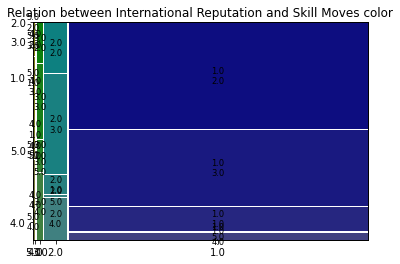

In [ ]:
mosaic(df,["InternationalReputation","SkillMoves"],title=  "Relation between International Reputation and Skill Moves color")

# **`Body type of Athletes`**

In [ ]:
df["BodyType"].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [ ]:
body=df["BodyType"].value_counts()
body.index

Index(['Normal', 'Lean', 'Stocky', 'Shaqiri', 'Courtois', 'C. Ronaldo',
       'PLAYER_BODY_TYPE_25', 'Neymar', 'Akinfenwa', 'Messi'],
      dtype='object')

In [ ]:
fig = px.scatter(df, x=body.index, y=body,  facet_col=body.index,title="Body Type of Players",template="plotly_dark",labels={"y":"No of players","x":"Body_Type"})
fig.show()

# *Here we can observe that most of the players body is in normal lean or stocky*

# **`Higest remuneration received by players in a month and in a year`**

In [ ]:
df["Wage"]
df["Wage"].astype("str")

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18159, dtype: object

In [ ]:
df.Wage = df.Wage.str.replace('€', '')
df.Wage = df.Wage.str.replace('K', '')
df["Wage"]

0        565
1        405
2        290
3        260
4        355
        ... 
18202      1
18203      1
18204      1
18205      1
18206      1
Name: Wage, Length: 18159, dtype: object

In [ ]:
df['Wage'] = df['Wage'].str.replace('€','').str.replace('M',' 1000000').str.replace('K',' 1000')
df['Wage'] = df['Wage'].fillna(0).astype(np.float32)

In [ ]:
wage=df[["Wage","Name","Overall"]].sort_values(by="Wage",ascending=False)
wages=wage.head(20)
wages

,Wage,Name,Overall
0,565.0,L. Messi,94
7,455.0,L. Suárez,91
6,420.0,L. Modrić,91
1,405.0,Cristiano Ronaldo,94
8,380.0,Sergio Ramos,91
11,355.0,T. Kroos,90
36,355.0,G. Bale,88
4,355.0,K. De Bruyne,91
5,340.0,E. Hazard,91
32,340.0,Coutinho,88


In [ ]:
fig=px.bar(wages,x="Name",y="Wage",title="Higest remuneration received by players",
           labels={
                     "Wage": "Wage(IN 1000 DOLLARS)"
                 },template="plotly_dark")
fig.show()

In [ ]:
df['Yearly Wage'] = df['Wage'] * 52
print(df)

           ID                Name  Age  ... GKPositioning GKReflexes  Yearly Wage
0      158023            L. Messi   31  ...          14.0        8.0      29380.0
1       20801   Cristiano Ronaldo   33  ...          14.0       11.0      21060.0
2      190871           Neymar Jr   26  ...          15.0       11.0      15080.0
3      193080              De Gea   27  ...          88.0       94.0      13520.0
4      192985        K. De Bruyne   27  ...          10.0       13.0      18460.0
...       ...                 ...  ...  ...           ...        ...          ...
18202  238813        J. Lundstram   19  ...           8.0        9.0         52.0
18203  243165  N. Christoffersson   19  ...           5.0       12.0         52.0
18204  241638           B. Worman   16  ...           6.0       13.0         52.0
18205  246268      D. Walker-Rice   17  ...           8.0        9.0         52.0
18206  246269           G. Nugent   16  ...          12.0        9.0         52.0

[18159 rows x 8

In [ ]:
wa=df[["Yearly Wage","Name"]].sort_values(by="Yearly Wage",ascending=False)
wags=wa.head(20)
wags

,Yearly Wage,Name
0,29380.0,L. Messi
7,23660.0,L. Suárez
6,21840.0,L. Modrić
1,21060.0,Cristiano Ronaldo
8,19760.0,Sergio Ramos
11,18460.0,T. Kroos
36,18460.0,G. Bale
4,18460.0,K. De Bruyne
5,17680.0,E. Hazard
32,17680.0,Coutinho


In [ ]:
fig=px.bar(wags,x="Name",y="Yearly Wage",title="Higest remuneration received by players in a Year",
           labels={
                     "Wage": "Wage(IN 1000 DOLLARS)"
                 },color_discrete_sequence=None,template="plotly_dark")
fig.show()

# *Here Fom the graph it is visually exploring about the top 10 players having high salaries*

# **`Average salary of players in a country `**

In [ ]:
wq=df[["Nationality","Wage"]].groupby(by="Nationality",as_index=False).mean()
wq["Latitude"]=latitude
wq["Longitude"]=longitude

In [ ]:
wq

,Nationality,Wage,Latitude,Longitude
0,Afghanistan,1.250000,52.531021,-1.264906
1,Albania,7.256410,51.083420,10.423447
2,Algeria,18.083334,39.326068,-4.837979
3,Andorra,1.000000,-34.996496,-64.967282
4,Angola,7.666667,46.603354,1.888334
...,...,...,...,...
159,Uzbekistan,9.000000,35.944673,14.383631
160,Venezuela,6.272727,16.825979,-88.760093
161,Wales,12.093023,7.869943,29.666790
162,Zambia,3.444444,-23.168178,24.592874


In [ ]:
fig = px.scatter_mapbox(wq, lat="Latitude", lon="Longitude", hover_name="Nationality",hover_data=["Wage"]
                        ,color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# **`Relationship between stamina and strenght`**

In [ ]:
stam=df[["Stamina","Strength"]]
stam

,Stamina,Strength
0,72.0,59.0
1,88.0,79.0
2,81.0,49.0
3,43.0,64.0
4,90.0,75.0
...,...,...
18202,40.0,47.0
18203,43.0,67.0
18204,55.0,32.0
18205,40.0,48.0


In [ ]:
px.scatter_matrix(stam,template="plotly_dark",title="Stamina VS Strength")

In [ ]:
px.scatter(stam,x="Stamina",y="Strength",trendline='ols',trendline_color_override='red',template="plotly_dark",title="Stamina VS Strength")

# *Since the r^2 value is 0.06 there is small negative association betwwen the variables strength and stamina*